## Step 2 Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environments.BiddingEnvironment import *
from learners.GTS_Learner import *
from learners.GPTS_Learner import *
from data_generators.basic_generator import *

In [2]:
data_gen = BasicDataGenerator('src/basic002.json')

prices = data_gen.get_prices()
bids = data_gen.get_bids()

aggr_cpc = data_gen.get_costs_per_click(mode='aggregate')
aggr_d_clicks = data_gen.get_daily_clicks(mode='aggregate')
aggr_conv_rates = data_gen.get_conversion_rates(mode='aggregate')
aggr_purch = data_gen.get_future_purchases(mode='aggregate')
#aggr_purch = np.zeros(len(bids))

In [3]:
n_arms = len(bids)

min_bid = min(bids)
max_bid = max(bids)

b = np.linspace(0.0, 1.0, n_arms) #np.array(d.get_bids())
sigma = 10

In [4]:
print('\nDATA:')
print(f'{prices=}')
print(f'{bids=}')
print(f'{aggr_cpc=}')
print(f'{aggr_d_clicks=}')
print(f'{aggr_conv_rates=}')
print(f'{aggr_purch=}')


DATA:
prices=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids=[0.03, 0.04, 0.07, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]
aggr_cpc=array([0.03 , 0.04 , 0.069, 0.097, 0.189, 0.44 , 0.626, 0.796, 1.1  ,
       1.367])
aggr_d_clicks=array([ 20.018,  26.03 ,  42.358,  56.468,  91.773, 143.8  , 163.133,
       174.226, 185.61 , 190.621])
aggr_conv_rates=array([0.204, 0.211, 0.205, 0.189, 0.176, 0.152, 0.128, 0.113, 0.097,
       0.09 ])
aggr_purch=array([2.85 , 2.485, 2.12 , 1.755, 1.39 , 1.025, 0.84 , 0.69 , 0.65 ,
       0.65 ])


In [17]:
T = 200
n_experiments = 3

gts_rewards_per_experiment = []
gpts_rewards_per_experiment = []

In [18]:
for e in range(0, n_experiments):
    env = BiddingEnvironment(bids = b, sigma = sigma, n_clicks = aggr_d_clicks, cpc = aggr_cpc, \
                             conversion_rates = aggr_conv_rates, margins = prices, tau = aggr_purch, price_idx = 0)
    gts_learner = GTS_Learner(n_arms = n_arms)
    gpts_learner = GPTS_Learner(n_arms = n_arms, arms = bids)
    for t in range(0, T):
        #pulled_arm = gts_learner.pull_arm()
        #reward = env.round(pulled_arm)
        #gts_learner.update(pulled_arm, reward)
        
        pulled_arm = gpts_learner.pull_arm()
        reward = env.round(pulled_arm)
        if(e == 0):
            print('reward = ' + f'{reward}')
            
        gpts_learner.update(pulled_arm, reward)
        
    gts_rewards_per_experiment.append(gts_learner.collected_rewards)
    gpts_rewards_per_experiment.append(gpts_learner.collected_rewards)

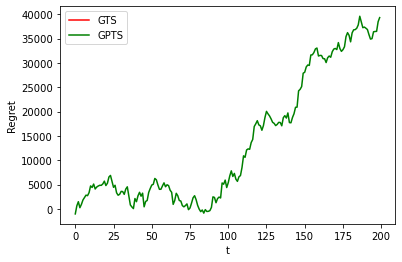

In [19]:
#opt = np.max(env.means)
opt = env.get_opt()

plt.figure(0)
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(opt - gts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gpts_rewards_per_experiment, axis=0)), 'g')
plt.legend(['GTS', 'GPTS'])
plt.show()